<a href="https://colab.research.google.com/github/L4-DEV/Alura-Challenge/blob/main/AluraTelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TelecomX Alura

## Contexo da atividade.

A empresa TELECOMX enfrenta um alto índice de evasão de clientes sem entender a causa. Minha missão, como assistente de análise de dados, é crucial: serei responsável por todo o processo de ETL (Extração, Transformação e Carga) dos dados. Começarei extraindo informações de uma API no GitHub, aplicando técnicas de limpeza e tratamento de dados e, por fim, realizando uma Análise Exploratória (EDA) detalhada, com gráficos e visualizações. O objetivo é identificar padrões de comportamento dos clientes que levam ao "churn". Esse trabalho fundamental permitirá que a equipe de Data Science crie modelos preditivos para reduzir a evasão, fornecendo insights valiosos e sugestões para a empresa. Será uma imersão completa em Pandas, Seaborn e Matplotlib, visando transformar dados brutos em inteligência estratégica.

*Objetivo* : buscar, tratar, realizar análise exploratória.

1. Buscar : importar a base.

2. Tratar : limpeza de dados.

3. Explorar : insighs

4. Relatório do processo: objetivo da ánalise e problema(introdução),
descrever processo de ETL, análise exploratoria e graficos, conclusão com base nos estudos.

#📌 Extracão

##1. Preparando o Ambiente – Importação da Base



Nesta etapa vamos importar a base de dados do github, fornecida anteriormente. (https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json)

In [ ]:
import pandas as pd
import requests
import json

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

In [ ]:
# Ver estrutura do primeiro item
print(json.dumps(data[0], indent=2))

{
  "customerID": "0002-ORFBO",
  "Churn": "No",
  "customer": {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "Yes",
    "tenure": 9
  },
  "phone": {
    "PhoneService": "Yes",
    "MultipleLines": "No"
  },
  "internet": {
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "Yes",
    "StreamingTV": "Yes",
    "StreamingMovies": "No"
  },
  "account": {
    "Contract": "One year",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Mailed check",
    "Charges": {
      "Monthly": 65.6,
      "Total": "593.3"
    }
  }
}


Normalizando o aninhamento do df

In [ ]:
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

##2. Tratamento e Limpeza de Dados



###A) Visualização e padronização de colunas

In [ ]:
df.columns = df.columns.str.replace('customer.', '', regex=False)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Como temos padronização dos nomes, ao invés de fazer o replace 1 por 1 vou iterar com for each para otimização de código.

In [ ]:
#Removendo prefixos descartaveis
prefixos = ['customer.', 'phone.', 'internet.','account.']
for prefixo in prefixos:
  df.columns = df.columns.str.replace(prefixo,'', regex=False)

df.columns = df.columns.str.replace('Charges.','Charges_', regex=False)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Adicionando underscore entre palavras compostas

In [ ]:
import re

# Adiciona "_" entre palavras compostas baseadas na transição de letra minúscula para maiúscula
df.columns = df.columns.str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)
df.head()

,customer_ID,Churn,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Padronizando prefixos com letra maiúscula, no inicio da palavra.

In [ ]:
df.columns = df.columns.str.title()
df.head()

,Customer_Id,Churn,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_Tv,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###B) Tratamento de valores

Verificando dados nulos

In [ ]:
df.isnull().sum()


,0
Customer_Id,0
Churn,0
Gender,0
Senior_Citizen,0
Partner,0
Dependents,0
Tenure,0
Phone_Service,0
Multiple_Lines,0
Internet_Service,0


In [ ]:
potenciais_binarias = [
    'Churn', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Online_Security',
    'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_Tv',
    'Streaming_Movies', 'Paperless_Billing'
]

In [ ]:

for col in potenciais_binarias:
    print(f"{col}: {df[col].unique()}")

Churn: ['No' 'Yes' '']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
Phone_Service: ['Yes' 'No']
Multiple_Lines: ['No' 'Yes' 'No phone service']
Online_Security: ['No' 'Yes' 'No internet service']
Online_Backup: ['Yes' 'No' 'No internet service']
Device_Protection: ['No' 'Yes' 'No internet service']
Tech_Support: ['Yes' 'No' 'No internet service']
Streaming_Tv: ['Yes' 'No' 'No internet service']
Streaming_Movies: ['No' 'Yes' 'No internet service']
Paperless_Billing: ['Yes' 'No']


In [ ]:
for col in potenciais_binarias:
    qtd_vazios = df[col].astype(str).str.strip().eq('').sum()
    print(f"{col}: {qtd_vazios} valores vazios")

Churn: 224 valores vazios
Partner: 0 valores vazios
Dependents: 0 valores vazios
Phone_Service: 0 valores vazios
Multiple_Lines: 0 valores vazios
Online_Security: 0 valores vazios
Online_Backup: 0 valores vazios
Device_Protection: 0 valores vazios
Tech_Support: 0 valores vazios
Streaming_Tv: 0 valores vazios
Streaming_Movies: 0 valores vazios
Paperless_Billing: 0 valores vazios


In [ ]:
len(df)

7267

In [ ]:
df.shape

(7267, 21)

In [ ]:
df = df[df['Churn'].astype(str).str.strip() != '']


In [ ]:
for col in potenciais_binarias:
    qtd_vazios = df[col].astype(str).str.strip().eq('').sum()
    print(f"{col}: {qtd_vazios} valores vazios")

Churn: 0 valores vazios
Partner: 0 valores vazios
Dependents: 0 valores vazios
Phone_Service: 0 valores vazios
Multiple_Lines: 0 valores vazios
Online_Security: 0 valores vazios
Online_Backup: 0 valores vazios
Device_Protection: 0 valores vazios
Tech_Support: 0 valores vazios
Streaming_Tv: 0 valores vazios
Streaming_Movies: 0 valores vazios
Paperless_Billing: 0 valores vazios


In [ ]:
len(df)

7043

Verificando tipagem

In [ ]:
df.dtypes


,0
Customer_Id,object
Churn,object
Gender,object
Senior_Citizen,int64
Partner,object
Dependents,object
Tenure,int64
Phone_Service,object
Multiple_Lines,object
Internet_Service,object


Alterando e verificando se deu certo

In [ ]:
altera_gender = df['Gender'].astype('category')

# Verifica o novo tipo
print(altera_gender.dtypes)

category


In [ ]:
df['Gender'] = df['Gender'].astype('category')
print(df['Gender'].dtypes)
print(df['Gender'].cat.categories)

category
Index(['Female', 'Male'], dtype='object')


Alterando agrupando por tipo

In [ ]:
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')

categorical_cols = ['Gender', 'Internet_Service', 'Online_Security', 'Online_Backup',
                    'Device_Protection', 'Tech_Support', 'Streaming_Tv', 'Streaming_Movies',
                    'Contract', 'Payment_Method', 'Multiple_Lines','Churn', 'Partner', 'Dependents', 'Phone_Service', 'Paperless_Billing','Senior_Citizen']

df[categorical_cols] = df[categorical_cols].astype('category')



In [ ]:
df.dtypes

,0
Customer_Id,object
Churn,category
Gender,category
Senior_Citizen,category
Partner,category
Dependents,category
Tenure,int64
Phone_Service,category
Multiple_Lines,category
Internet_Service,category


In [ ]:
df_nulos = df[df['Charges_Total'].isnull()]
print(df_nulos)

     Customer_Id Churn  Gender Senior_Citizen Partner Dependents  Tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     Phone_Service    Multiple_Lines Internet_Service  ...  \
975             No  No ph

In [ ]:
print(df[df['Charges_Total'].isnull()].index)

Index([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')


Após a conversão de tipos indentificamos valores invalidos que foram forçados pelo  errors='coerce' a se tornarem NaN, vamos eliminar essas linhas inteiras do DF pois como sao poucas não inteferirão na análise, vamos utilizar dropna sub set para dropar as linhas que tem NaN.

In [ ]:
df = df.dropna(subset=['Charges_Total'])

In [ ]:
print(df['Charges_Total'].isnull().sum())

0


In [ ]:
print(f'Registros duplicados: {df.duplicated().sum()}')

Registros duplicados: 0


In [ ]:
df.nunique().sort_values(ascending=False)

,0
Customer_Id,7032
Charges_Total,6530
Charges_Monthly,1584
Tenure,72
Payment_Method,4
Contract,3
Streaming_Movies,3
Device_Protection,3
Tech_Support,3
Online_Backup,3


In [ ]:
binarias = potenciais_binarias

for col in binarias:
    print(f"{col}: {df[col].unique()}")

Churn: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Partner: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Dependents: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Phone_Service: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Multiple_Lines: ['No', 'Yes', 'No phone service']
Categories (3, object): ['No', 'No phone service', 'Yes']
Online_Security: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Online_Backup: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Device_Protection: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Tech_Support: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Streaming_Tv: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Streaming_Movies: ['No', 'Yes', 'No internet service']
Categories (3, ob

In [ ]:
for col in binarias:
    df[col] = df[col].astype(str).str.strip().str.lower()

/tmp/ipython-input-650-1336410463.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-650-1336410463.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for col in binarias:
  print(f"{col}: {df[col].unique()}")

Churn: ['no' 'yes']
Partner: ['yes' 'no']
Dependents: ['yes' 'no']
Phone_Service: ['yes' 'no']
Multiple_Lines: ['no' 'yes' 'no phone service']
Online_Security: ['no' 'yes' 'no internet service']
Online_Backup: ['yes' 'no' 'no internet service']
Device_Protection: ['no' 'yes' 'no internet service']
Tech_Support: ['yes' 'no' 'no internet service']
Streaming_Tv: ['yes' 'no' 'no internet service']
Streaming_Movies: ['no' 'yes' 'no internet service']
Paperless_Billing: ['yes' 'no']


In [ ]:
for col in binarias:
    df[col] = (
        df[col]
        .apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else 3)
        .astype('category')
    )

In [ ]:
for col in binarias:
  print(f"{col}: {df[col].unique()}")

Churn: [0, 1]
Categories (2, int64): [0, 1]
Partner: [1, 0]
Categories (2, int64): [0, 1]
Dependents: [1, 0]
Categories (2, int64): [0, 1]
Phone_Service: [1, 0]
Categories (2, int64): [0, 1]
Multiple_Lines: [0, 1, 3]
Categories (3, int64): [0, 1, 3]
Online_Security: [0, 1, 3]
Categories (3, int64): [0, 1, 3]
Online_Backup: [1, 0, 3]
Categories (3, int64): [0, 1, 3]
Device_Protection: [0, 1, 3]
Categories (3, int64): [0, 1, 3]
Tech_Support: [1, 0, 3]
Categories (3, int64): [0, 1, 3]
Streaming_Tv: [1, 0, 3]
Categories (3, int64): [0, 1, 3]
Streaming_Movies: [0, 1, 3]
Categories (3, int64): [0, 1, 3]
Paperless_Billing: [1, 0]
Categories (2, int64): [0, 1]


In [ ]:
df_temp = df[binarias].copy()

for col in binarias:
    df_temp[col] = df_temp[col].astype('category')


In [ ]:
df_temp.head()

,Churn,Partner,Dependents,Phone_Service,Multiple_Lines,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_Tv,Streaming_Movies,Paperless_Billing
0,0,1,1,1,0,0,1,0,1,1,0,1
1,0,0,0,1,1,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1
3,1,1,0,1,0,0,1,1,0,1,1,1
4,1,1,0,1,0,0,0,0,1,1,0,1


In [ ]:
for col in binarias:
    df[col] = df[col].astype('category')
df.dtypes

,0
Customer_Id,object
Churn,category
Gender,category
Senior_Citizen,category
Partner,category
Dependents,category
Tenure,int64
Phone_Service,category
Multiple_Lines,category
Internet_Service,category


Padronizando no e yes para depois transformar

In [ ]:
df.head()

,Customer_Id,Churn,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_Tv,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [ ]:
df.dtypes

,0
Customer_Id,object
Churn,category
Gender,category
Senior_Citizen,category
Partner,category
Dependents,category
Tenure,int64
Phone_Service,category
Multiple_Lines,category
Internet_Service,category


In [ ]:
for col in df:
    print(f"{col}: {df[col].unique()}")

Customer_Id: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: [0, 1]
Categories (2, int64): [0, 1]
Gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Senior_Citizen: [0, 1]
Categories (2, int64): [0, 1]
Partner: [1, 0]
Categories (2, int64): [0, 1]
Dependents: [1, 0]
Categories (2, int64): [0, 1]
Tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Phone_Service: [1, 0]
Categories (2, int64): [0, 1]
Multiple_Lines: [0, 1, 3]
Categories (3, int64): [0, 1, 3]
Internet_Service: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
Online_Security: [0, 1, 3]
Categories (3, int64): [0, 1, 3]
Online_Backup: [1, 0, 3]
Categories (3, int64): [0, 1, 3]
Device_Protection: [0, 1, 3]
Categories (3, int64): [0, 1, 3]
Tech_Support: [1, 0, 

In [ ]:
df_temp.isnull().sum()

,0
Churn,0
Partner,0
Dependents,0
Phone_Service,0
Multiple_Lines,0
Online_Security,0
Online_Backup,0
Device_Protection,0
Tech_Support,0
Streaming_Tv,0


In [ ]:
df.to_csv('df_tratado.csv', index=False)

In [ ]:
# Copia o DataFrame para evitar alterações diretas (opcional)
df = df.copy()

# Calcula dias totais
df["Total_Days"] = df["Tenure"] * 30

# Evita divisão por zero
df["Charges_Daily"] = df["Charges_Total"] / df["Total_Days"]
df["Charges_Daily"] = df["Charges_Daily"].replace([float('inf'), -float('inf')], None)

df.head()

,Customer_Id,Churn,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,...,Tech_Support,Streaming_Tv,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total,Total_Days,Charges_Daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,270,2.197407
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,270,2.008889
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,120,2.340417
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,390,3.173974
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,90,2.971111


In [ ]:
for col in binarias:
    df[col] = df[col].astype('category')
df.dtypes

,0
Customer_Id,object
Churn,category
Gender,category
Senior_Citizen,category
Partner,category
Dependents,category
Tenure,int64
Phone_Service,category
Multiple_Lines,category
Internet_Service,category


#📊 Carga e Análise

## 3. Análise Descritiva

###A) Colunas Numéricas

In [ ]:
df.describe()


,Tenure,Charges_Monthly,Charges_Total,Total_Days,Charges_Daily
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,972.653584,2.159981
std,24.545260,30.085974,2266.771362,736.357791,1.006196
min,1.000000,18.250000,18.800000,30.000000,0.459167
25%,9.000000,35.587500,401.450000,270.000000,1.205996
50%,29.000000,70.350000,1397.475000,870.000000,2.345775
75%,55.000000,89.862500,3794.737500,1650.000000,3.005985
max,72.000000,118.750000,8684.800000,2160.000000,4.046667


1. **Churn**: A maioria dos clientes continua no serviço, mas há uma taxa significativa de churn (26%).

Interpretação: Há grande variação no tempo que os clientes permanecem. Possível segmentar por "novatos" e "fiéis".

2. **Tenure** (tempo de permanência em meses)

Interpretação: Há grande variação no tempo que os clientes permanecem. Possível segmentar por "novatos" e "fiéis".

3. **Charges_Monthly** (valor pago por mês)

Interpretação: A maioria paga entre  35 reais e  90 reais por mês, mas alguns pagam bem menos, o que puxa a média para baixo. Pode indicar promoções, planos antigos ou descontos.

4. **Charges_Total** (valor total já pago)

Interpretação: Clientes que ficam mais tempo (maior tenure) naturalmente pagam mais. Pode ser interessante cruzar com Churn para ver se valores mais altos influenciam a saída.

5. **Daily_Charges** (custo diário)
Interpretação: O custo diário é relativamente baixo, mas alguns clientes pagam muito pouco (talvez uso parcial do mês, planos baratos, isenções?).

###B) Colunas Categóricas

In [ ]:
import pandas as pd

# Lista das colunas categóricas
colunas_categoricas = [
    "Gender", "Senior_Citizen", "Partner", "Dependents",
    "Phone_Service", "Multiple_Lines", "Internet_Service",
    "Online_Security", "Online_Backup", "Tech_Support",
    "Contract", "Paperless_Billing", "Payment_Method"
]

# Loop para descrever cada coluna
for col in colunas_categoricas:
    print(f"\n Coluna: {col}")
    print("-" * 40)
    print("Contagem absoluta:")
    print(df[col].value_counts())
    print("\nContagem percentual:")
    print(df[col].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))


 Coluna: Gender
----------------------------------------
Contagem absoluta:
Gender
Male      3549
Female    3483
Name: count, dtype: int64

Contagem percentual:
Gender
Male      50.47%
Female    49.53%
Name: proportion, dtype: object

 Coluna: Senior_Citizen
----------------------------------------
Contagem absoluta:
Senior_Citizen
0    5890
1    1142
Name: count, dtype: int64

Contagem percentual:
Senior_Citizen
0    83.76%
1    16.24%
Name: proportion, dtype: object

 Coluna: Partner
----------------------------------------
Contagem absoluta:
Partner
0    3639
1    3393
Name: count, dtype: int64

Contagem percentual:
Partner
0    51.75%
1    48.25%
Name: proportion, dtype: object

 Coluna: Dependents
----------------------------------------
Contagem absoluta:
Dependents
0    4933
1    2099
Name: count, dtype: int64

Contagem percentual:
Dependents
0    70.15%
1    29.85%
Name: proportion, dtype: object

 Coluna: Phone_Service
----------------------------------------
Contagem absolut

* **Senior_Citizen**

Apenas 16.24% são idosos.

Pode ser um grupo mais sensível a preço ou suporte.

Recomendado: analisar se idosos têm maior churn.

* **Partner**

48.25% têm parceiro(a).

Clientes com parceiros podem ter perfil mais estável → veja relação com Churn.

* **Dependents**

70.15% não têm dependentes.

Ter dependentes pode indicar família, maior tempo de uso e necessidade de estabilidade.

* **Phone_Service**

90.33% têm telefone, ou seja, é o serviço mais comum.

Apenas 9.67% não têm — grupo pequeno, talvez menos engajado ou com planos específicos.

* **Multiple_Lines**

42.19% têm múltiplas linhas, 48.14% têm apenas uma, e 9.67% têm 3, que possivelmente representa “sem serviço de telefone” (valor codificado erroneamente).

* **Internet_Service**

44% têm fibra ótica, 34% DSL, 22% não têm internet.

Clientes com fibra tendem a pagar mais (verificar Charges_Monthly) — cruzar com churn pode indicar insatisfação com preço ou instabilidade do serviço.

* **Online_Security, Online_Backup, Tech_Support**

Todos com o mesmo padrão:

~50% não têm o serviço

~28% têm

~22% não têm internet (3 → também precisa ser recodificado)

*Insight*: Grande parte dos clientes não contrata serviços extras, o que pode ser oportunidade de upsell — ou indicativo de falta de interesse/valor percebido.

* **Contract**

55.11% têm contrato mensal (month-to-month) → grupo mais instável.

Clientes com contratos de 1 ou 2 anos são menos propensos a churn.

Muito importante cruzar com Churn, pois contrato mensal geralmente tem maior cancelamento.

* **Paperless_Billing**

59.27% usam cobrança eletrônica → prático, mas costuma se associar a maior churn em alguns estudos, por indicar menor contato com a empresa.

* **Payment_Method**
Pagamento com débito automático e cartão de crédito representam 43.56% do total.

* **Cheque eletrônico** (33.63%) lidera.


##4. Cruzamentos com Churn

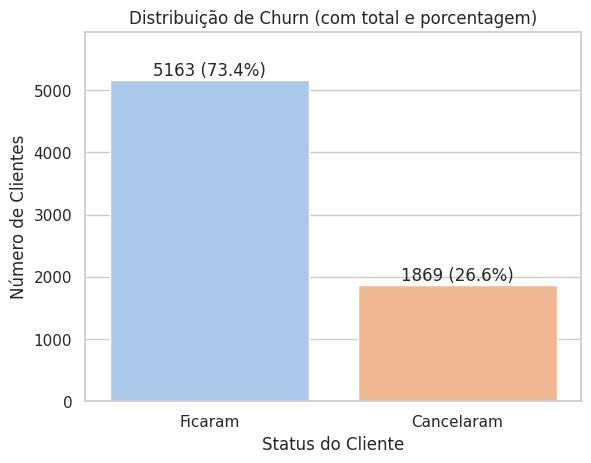

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem absoluta de churn
churn_counts = df["Churn"].value_counts().sort_index()
total = churn_counts.sum()
labels = ["Ficaram", "Cancelaram"]

# Cria o gráfico
ax = sns.countplot(data=df, x="Churn", hue="Churn", palette="pastel", legend=False)

# Adiciona os valores e porcentagens no topo de cada barra
for i, count in enumerate(churn_counts):
    percent = count / total * 100
    ax.text(i, count + total * 0.01, f"{count} ({percent:.1f}%)", ha='center', fontsize=12)

# Ajustes visuais
ax.set_xticks([0, 1])
ax.set_xticklabels(labels)
plt.title("Distribuição de Churn (com total e porcentagem)")
plt.xlabel("Status do Cliente")
plt.ylabel("Número de Clientes")
plt.ylim(0, churn_counts.max() * 1.15)  # Espaço para texto
plt.show()


###A) Evasão por variáveis categóricas

Após analise de todas as colunas em grafico, selecionei as colunas que realmente demonstraram algum impacto no churn

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define faixas de tempo de contrato (Tenure)
bins = [0, 12, 24, 48, 72]
labels = ['0-12', '13-24', '25-48', '49-72']

# Corrige os nomes dos serviços extras conforme o seu DataFrame
servicos_extras = [
    "Online_Security", "Online_Backup", "Device_Protection",
    "Tech_Support", "Streaming_Tv", "Streaming_Movies"
]

# Garante a coluna Tenure com T maiúsculo
df_adultos_net["Faixa_Tenure"] = pd.cut(df_adultos_net["Tenure"], bins=bins, labels=labels, right=True)
df_idosos_net["Faixa_Tenure"] = pd.cut(df_idosos_net["Tenure"], bins=bins, labels=labels, right=True)

# Marca se o cliente tem pelo menos 1 serviço extra
df_adultos_net["Tem_Servico_Extra"] = df_adultos_net[servicos_extras].apply(lambda row: any(row == "Yes"), axis=1)
df_idosos_net["Tem_Servico_Extra"] = df_idosos_net[servicos_extras].apply(lambda row: any(row == "Yes"), axis=1)

# Cria subplots lado a lado
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        "Adultos com Internet - Churn por Tenure e Serviços Extras",
        "Idosos com Internet - Churn por Tenure e Serviços Extras"
    )
)

# ==== ADULTOS ====
agrupado_adultos = (
    df_adultos_net
    .groupby(["Faixa_Tenure", "Tem_Servico_Extra"], observed=True)["Churn"]
    .mean()
    .reset_index()
)

for status in agrupado_adultos["Tem_Servico_Extra"].unique():
    dados = agrupado_adultos[agrupado_adultos["Tem_Servico_Extra"] == status]
    fig.add_trace(
        go.Scatter(
            x=dados["Faixa_Tenure"],
            y=dados["Churn"],
            mode="lines+markers+text",
            name=f"Adultos - {'Com Serviço Extra' if status else 'Sem Serviço Extra'}",
            text=[f"{x:.1%}" for x in dados["Churn"]],
            textposition="top center"
        ),
        row=1, col=1
    )

# ==== IDOSOS ====
agrupado_idosos = (
    df_idosos_net
    .groupby(["Faixa_Tenure", "Tem_Servico_Extra"], observed=True)["Churn"]
    .mean()
    .reset_index()
)

for status in agrupado_idosos["Tem_Servico_Extra"].unique():
    dados = agrupado_idosos[agrupado_idosos["Tem_Servico_Extra"] == status]
    fig.add_trace(
        go.Scatter(
            x=dados["Faixa_Tenure"],
            y=dados["Churn"],
            mode="lines+markers+text",
            name=f"Idosos - {'Com Serviço Extra' if status else 'Sem Serviço Extra'}",
            text=[f"{x:.1%}" for x in dados["Churn"]],
            textposition="top center"
        ),
        row=1, col=2
    )

# Ajustes finais do gráfico
fig.update_layout(
    height=500,
    width=1100,
    title_text="Churn por Faixa de Tenure e Serviços Extras",
    showlegend=True,
    yaxis_tickformat=".0%",
)

fig.update_xaxes(title_text="Faixa de Tempo de Contrato", row=1, col=1)
fig.update_yaxes(title_text="Churn Médio", row=1, col=1)
fig.update_xaxes(title_text="Faixa de Tempo de Contrato", row=1, col=2)
fig.update_yaxes(title_text="Churn Médio", row=1, col=2)

fig.show()


***Anotações sobre análise de Churn dados categoricos***
* Senior_Citizen

O número total de churn é maior entre adultos do que entre idosos,
porém idosos geralmente representam uma quantidade menor no total de contratos.
Será necessário verificar a proporção relativa de churn em cada grupo.

* Partner

 Clientes sem parceria representam 64,2% do churn,
indicando que ter parceria ajuda a reter mais clientes.

* Dependents

Clientes que têm dependentes evadem menos, correspondendo a apenas 17,4% do churn.

* Phone_Service

Das pessoas que evadiram, 90,9% possuem serviço de telefone,
o que pode indicar insatisfação com esse serviço.

* Multiple_Lines

Ter múltiplas linhas ou não não influencia muito no churn,
está bem dividido e 9,1% dos que evadiram não têm serviço de telefone.

* Internet_Service

69% dos clientes que evadiram têm internet do tipo fibra óptica,
o que pode indicar insatisfação com o serviço ou preço.

* Online_Security / Online_Backup / Device_Protection / Tech_Support

De modo geral, clientes sem esses serviços adicionais representam mais de 60% da evasão,
indicando que ter serviços adicionais auxilia na retenção.

* Streaming_TV e Streaming_Movies

Clientes com pelo menos um desses serviços representam 50% do churn,
indicando possível insatisfação com preço ou qualidade do serviço.

* Contract

Clientes com contrato mensal (mês a mês) representam 88% do churn,
sugerindo insatisfação com preço ou condições contratuais.

* Paperless_Billing

Clientes que utilizam esse tipo de pagamento representam 74,9% do churn,
podendo indicar complicações na logística ou fluxo de pagamento.

* Payment_Method
O método "electronic check" representa 57,3% dos clientes que evadiram,
enquanto os demais métodos se mantêm consistentes abaixo de 17% e acima de 12%.

###B) Evasão por variáveis numéricas

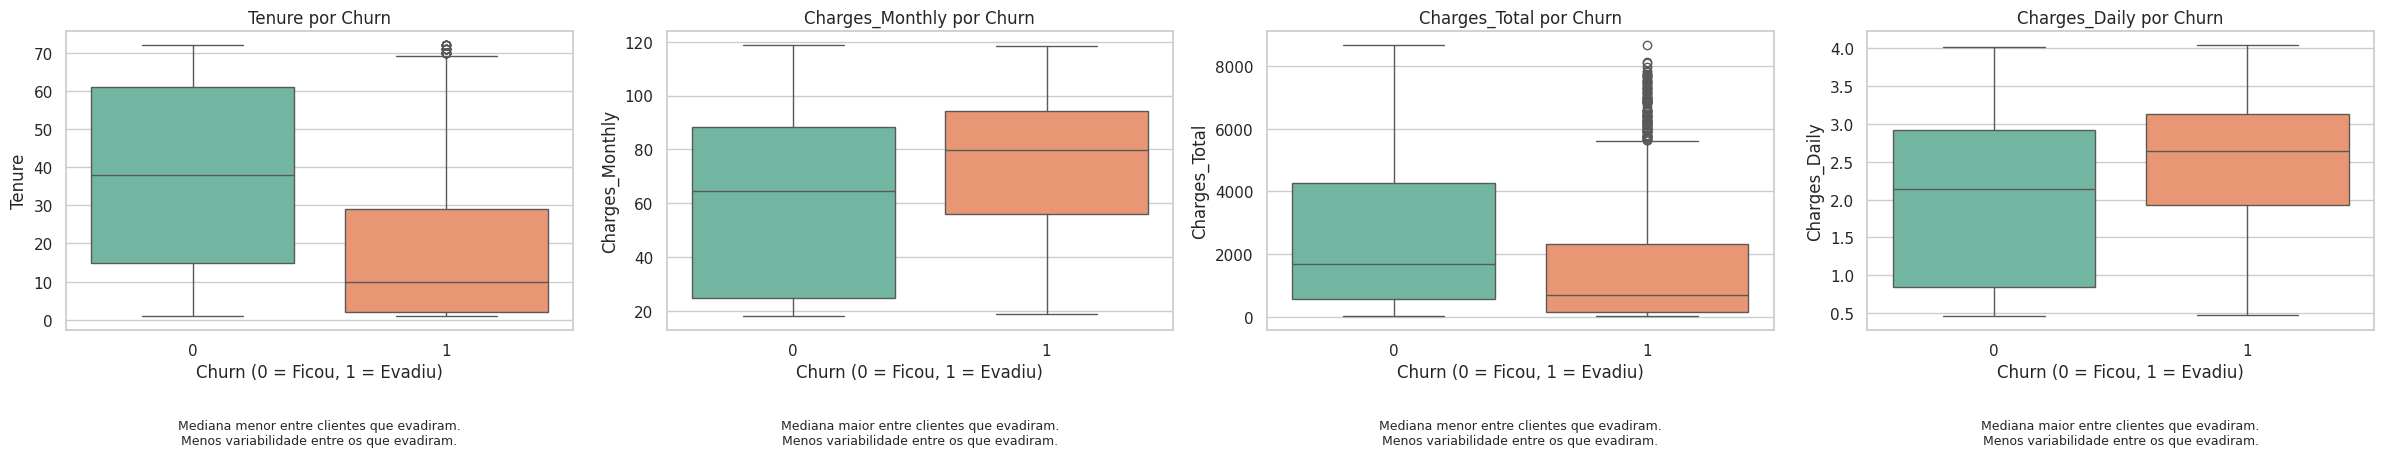

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numerical_by_churn_with_explanation_multiplot(df, columns):
    import numpy as np

    if "Charges_Daily" not in df.columns:
        df = df.copy()
        df["Total_Days"] = df["Tenure"] * 30
        df["Charges_Daily"] = df["Charges_Total"] / df["Total_Days"]
        df["Charges_Daily"].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

    n = len(columns)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 5), sharey=False)

    for i, coluna in enumerate(columns):
        ax = axes[i] if n > 1 else axes

        sns.boxplot(
            data=df,
            x="Churn",
            y=coluna,
            hue="Churn",
            palette="Set2",
            legend=False,
            ax=ax
        )

        ax.set_title(f'{coluna} por Churn')
        ax.set_xlabel("Churn (0 = Ficou, 1 = Evadiu)")
        ax.set_ylabel(coluna)

        mediana_0 = df[df["Churn"] == 0][coluna].median()
        mediana_1 = df[df["Churn"] == 1][coluna].median()
        std_0 = df[df["Churn"] == 0][coluna].std()
        std_1 = df[df["Churn"] == 1][coluna].std()

        if mediana_1 > mediana_0:
            tendencia = f"Mediana maior entre clientes que evadiram."
        elif mediana_1 < mediana_0:
            tendencia = f"Mediana menor entre clientes que evadiram."
        else:
            tendencia = f"Medianas iguais entre os grupos."

        if std_1 > std_0:
            dispersao = "Mais variabilidade entre os que evadiram."
        elif std_1 < std_0:
            dispersao = "Menos variabilidade entre os que evadiram."
        else:
            dispersao = "Variabilidade similar entre os grupos."

        texto = f"{tendencia}\n{dispersao}"
        ax.text(0.5, -0.3, texto, ha='center', va='top', fontsize=9, transform=ax.transAxes)

    plt.tight_layout()
    plt.show()

# Use assim:
cols = ["Tenure", "Charges_Monthly", "Charges_Total", "Charges_Daily"]
plot_numerical_by_churn_with_explanation_multiplot(df, cols)


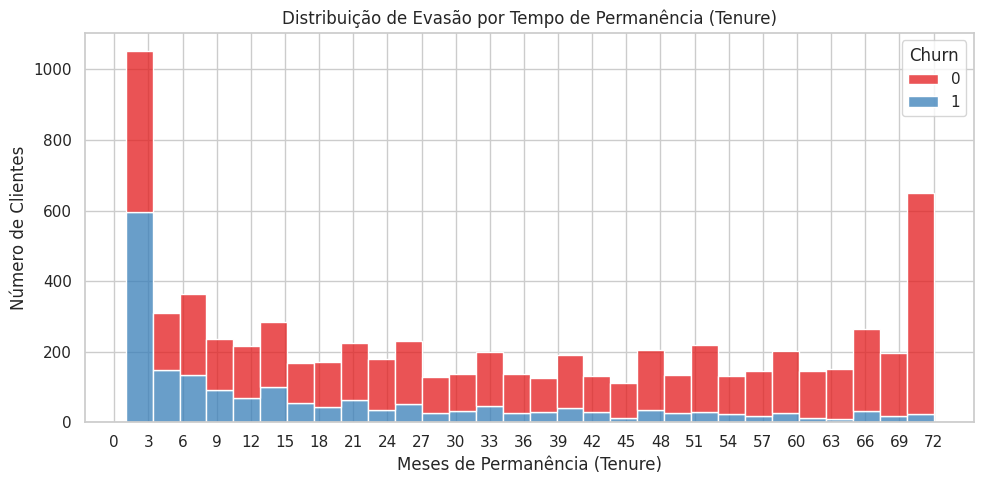

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Tenure", hue="Churn", multiple="stack", palette="Set1", bins=30)

plt.title("Distribuição de Evasão por Tempo de Permanência (Tenure)")
plt.xlabel("Meses de Permanência (Tenure)")
plt.ylabel("Número de Clientes")

# Define os ticks a cada 3 meses (trimestre)
max_tenure = df["Tenure"].max()
plt.xticks(np.arange(0, max_tenure + 1, 3))

plt.tight_layout()
plt.show()


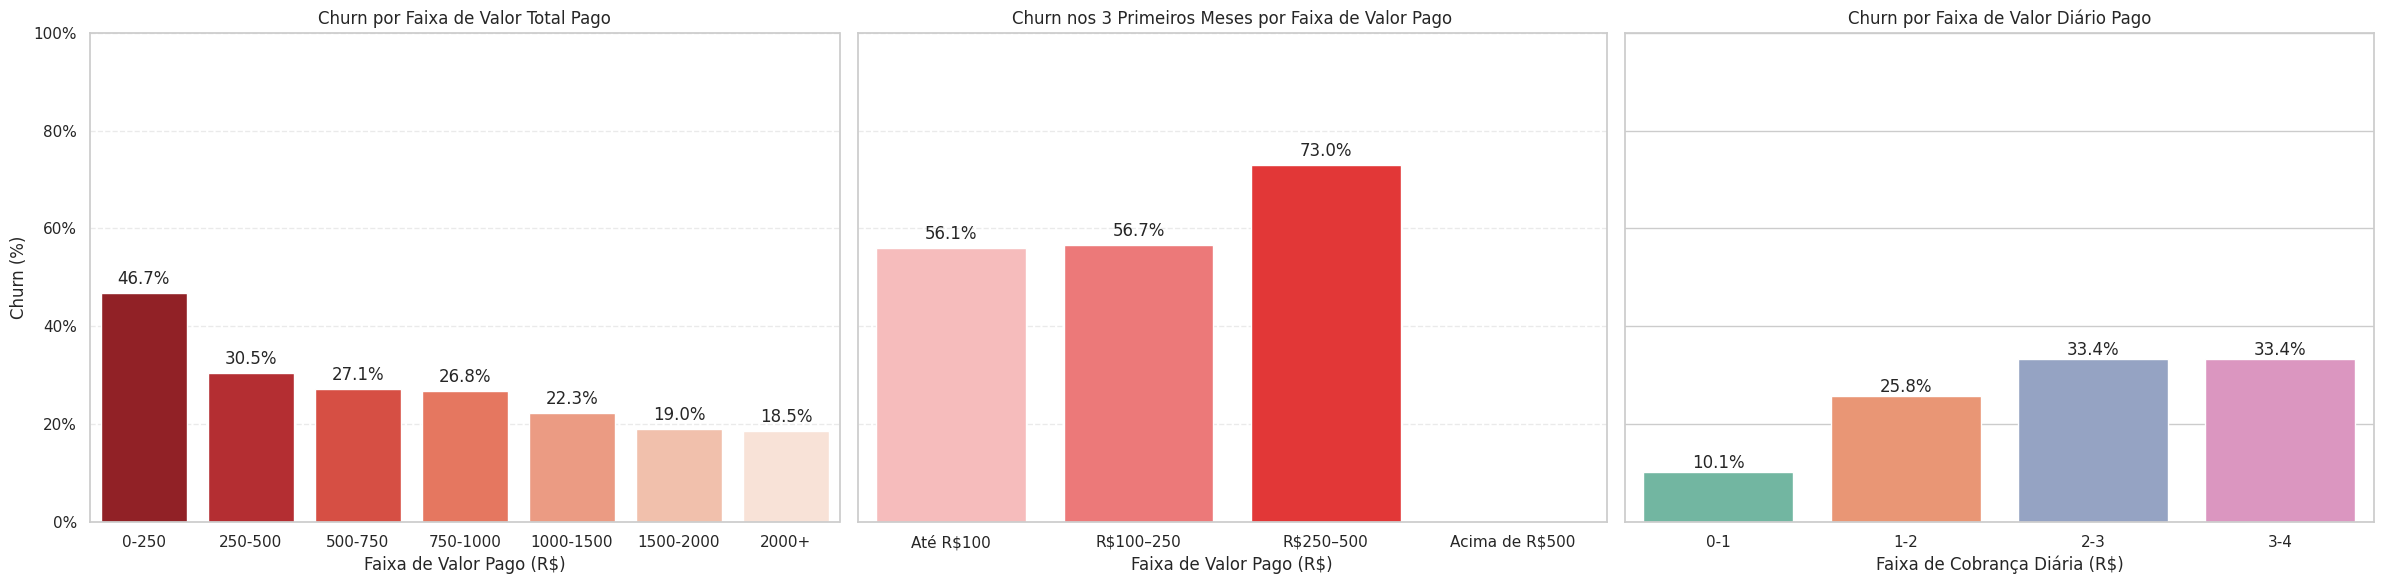

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Garantir que 'Churn' é int
df["Churn"] = df["Churn"].astype(int)

# Preparação dos dados

# 1) Churn por faixa de valor total pago
bins_total = [0, 250, 500, 750, 1000, 1500, 2000, df["Charges_Total"].max()]
labels_total = ['0-250', '250-500', '500-750', '750-1000', '1000-1500', '1500-2000', '2000+']
df["Faixa_Valor_Total"] = pd.cut(df["Charges_Total"], bins=bins_total, labels=labels_total, right=False)

churn_por_faixa_total = (
    df.groupby("Faixa_Valor_Total", observed=True)["Churn"]
    .agg(["count", "sum"])
    .rename(columns={"count": "Total", "sum": "Churnados"})
)
churn_por_faixa_total["% Churn"] = churn_por_faixa_total["Churnados"] / churn_por_faixa_total["Total"]

# 2) Churn por faixa de valor total pago nos 3 primeiros meses
df_3meses = df[df["Tenure"] <= 3].copy()
bins_3meses = [0, 100, 250, 500, df["Charges_Total"].max()]
labels_3meses = ["Até R$100", "R$100–250", "R$250–500", "Acima de R$500"]
df_3meses["Faixa_Valor_3meses"] = pd.cut(df_3meses["Charges_Total"], bins=bins_3meses, labels=labels_3meses, right=False)

churn_por_faixa_3meses = (
    df_3meses.groupby("Faixa_Valor_3meses", observed=True)["Churn"]
    .agg(["count", "sum"])
    .rename(columns={"count": "Total", "sum": "Churnados"})
)
churn_por_faixa_3meses["% Churn"] = churn_por_faixa_3meses["Churnados"] / churn_por_faixa_3meses["Total"]

# 3) Churn por faixa de valor pago diariamente
if "Charges_Daily" not in df.columns:
    df["Charges_Daily"] = df["Charges_Monthly"] / 30

bins_diario = [0, 1, 2, 3, 4]
labels_diario = ['0-1', '1-2', '2-3', '3-4']
df['Faixa_Charges_Daily'] = pd.cut(df['Charges_Daily'], bins=bins_diario, labels=labels_diario, include_lowest=True)

churn_por_faixa_diario = df.groupby('Faixa_Charges_Daily', observed=True)['Churn'].mean().reset_index()

# Plotando lado a lado
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

# 1) Total pago
cores_total = sns.color_palette("Reds", n_colors=len(churn_por_faixa_total))[::-1]
sns.barplot(
    x=churn_por_faixa_total.index,
    y=churn_por_faixa_total["% Churn"],
    hue=churn_por_faixa_total.index,
    palette=cores_total,
    dodge=False,
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Churn por Faixa de Valor Total Pago")
axes[0].set_xlabel("Faixa de Valor Pago (R$)")
axes[0].set_ylabel("Churn (%)")
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axes[0].grid(axis='y', linestyle='--', alpha=0.4)
for i, valor in enumerate(churn_por_faixa_total["% Churn"]):
    axes[0].text(i, valor + 0.01, f"{valor:.1%}", ha='center', va='bottom')

# 2) Total pago nos 3 primeiros meses
cores_3meses = ["#FFB3B3", "#FF6666", "#FF1A1A", "#990000"]
sns.barplot(
    x=churn_por_faixa_3meses.index,
    y=churn_por_faixa_3meses["% Churn"],
    hue=churn_por_faixa_3meses.index,
    palette=cores_3meses,
    dodge=False,
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Churn nos 3 Primeiros Meses por Faixa de Valor Pago")
axes[1].set_xlabel("Faixa de Valor Pago (R$)")
axes[1].set_ylabel("")
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axes[1].grid(axis='y', linestyle='--', alpha=0.4)
for i, valor in enumerate(churn_por_faixa_3meses["% Churn"]):
    if pd.notna(valor) and valor > 0:
        axes[1].text(i, valor + 0.01, f"{valor:.1%}", ha='center', va='bottom')

# 3) Valor pago diário
sns.barplot(
    data=churn_por_faixa_diario,
    x='Faixa_Charges_Daily',
    y='Churn',
    hue='Faixa_Charges_Daily',
    palette='Set2',
    dodge=False,
    legend=False,
    ax=axes[2]
)
axes[2].set_title("Churn por Faixa de Valor Diário Pago")
axes[2].set_xlabel("Faixa de Cobrança Diária (R$)")
axes[2].set_ylabel("")
axes[2].set_ylim(0, 1)
for p in axes[2].patches:
    altura = p.get_height()
    axes[2].annotate(f'{altura*100:.1f}%', (p.get_x() + p.get_width() / 2, altura),
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()


* *Tenure*

Mais de 1000 clientes evadiram já no primeiro mês. Após o primeiro mês, os churns ficaram abaixo de 400 clientes por mês até cerca de 70 meses de serviço.
Isso indica que clientes com planos mais curtos pagam valores mais altos ou podem estar insatisfeitos com o serviço. Após 70 meses, a evasão aumenta novamente, o que pode indicar que o cliente “enjoa” ou perde interesse no serviço com o tempo.

* *Churn por valor pago mensal*

Clientes que pagam mais de R$250 apresentam uma taxa de churn aproximadamente 15% maior do que clientes que pagam menos que esse valor.

* *Churn por valor pago diário*

Para clientes que pagam acima de 2 reais por dia, o churn ultrapassa 30%.Na faixa entre 1  e 2 reais, o churn é cerca de 26%, e para os que pagam até 1 real por dia,
 o churn é 9,8%. Isso indica que, quanto mais barato o serviço, maior a retenção dos clientes e vice-versa.



##5. Análises por Perfil de Cliente

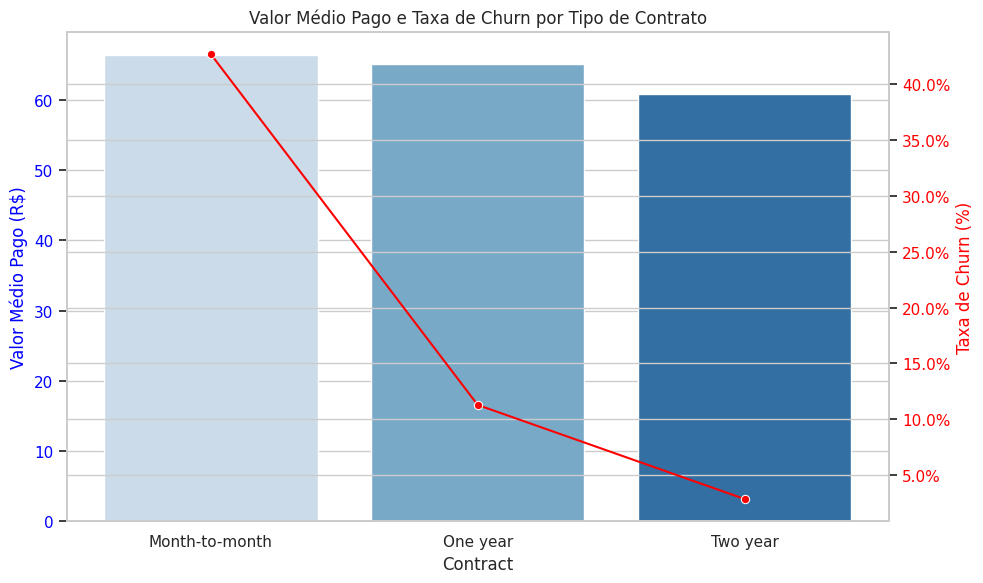

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Garantir churn como inteiro
df['Churn'] = df['Churn'].astype(int)

# Agrupar por contrato, calcular média do valor pago e taxa de churn
agrupado = df.groupby('Contract', observed=True).agg({
    'Charges_Monthly': 'mean',
    'Churn': 'mean'
}).reset_index()

# Configuração de plot
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot barras para valor pago médio
sns.barplot(x='Contract', y='Charges_Monthly', data=agrupado, hue='Contract', palette='Blues', legend=False)

ax1.set_ylabel('Valor Médio Pago (R$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar segundo eixo Y para churn
ax2 = ax1.twinx()
sns.lineplot(x='Contract', y='Churn', data=agrupado, ax=ax2, marker='o', color='red')
ax2.set_ylabel('Taxa de Churn (%)', color='red')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Valor Médio Pago e Taxa de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')

plt.tight_layout()
plt.show()


###A) Cruzamento com características demográficas

Considerando as colunas, idoso, parceiro e dependentes como perfis, para entender os comportamentos dos clientes

In [ ]:
# Média por tipo de contrato
df.groupby('Contract', observed=True)['Charges_Monthly'].mean()

# Média por presença de parceiros
df.groupby('Partner', observed=True)['Charges_Monthly'].mean()

# Média por combinação de serviços adicionais
df.groupby(['Internet_Service', 'Phone_Service'], observed=True)['Charges_Monthly'].mean()


Internet_Service  Phone_Service
DSL               0                41.992500
                  1                64.392713
Fiber optic       1                91.500129
No                1                21.076283
Name: Charges_Monthly, dtype: float64

In [ ]:
# Média da cobrança mensal por grupo Partner
media_por_partner = df.groupby('Partner', observed=True)['Charges_Monthly'].mean()
print("Média da cobrança mensal por grupo 'Partner':")
print(media_por_partner)

# Mediana da cobrança mensal por grupo Partner
mediana_por_partner = df.groupby('Partner', observed=True)['Charges_Monthly'].median()
print("\nMediana da cobrança mensal por grupo 'Partner':")
print(mediana_por_partner)


Média da cobrança mensal por grupo 'Partner':
Partner
0    61.956472
1    67.845977
Name: Charges_Monthly, dtype: float64

Mediana da cobrança mensal por grupo 'Partner':
Partner
0    68.65
1    74.85
Name: Charges_Monthly, dtype: float64


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Garante que Churn é float
df["Churn"] = df["Churn"].astype(float)

# 1. Proporção de clientes por Senior_Citizen
total_clientes = df.shape[0]
clientes_por_grupo = df["Senior_Citizen"].value_counts().sort_index()
pct_clientes = clientes_por_grupo / total_clientes

# 2. Proporção de churn dentro de cada grupo (sem warning)
churn_por_grupo = (
    df.groupby("Senior_Citizen", observed=True)["Churn"].mean()
)

# Nomes mais legíveis
labels = ["Não Idoso (0)", "Idoso (1)"]

# Gráfico
fig = go.Figure()

fig.add_trace(go.Bar(
    x=labels,
    y=pct_clientes.values,
    name="Proporção de Clientes",
    text=[f"{x:.1%}" for x in pct_clientes.values],
    textposition='auto',
    marker_color='lightskyblue'
))

fig.add_trace(go.Bar(
    x=labels,
    y=churn_por_grupo.values,
    name="Churn Médio",
    text=[f"{x:.1%}" for x in churn_por_grupo.values],
    textposition='auto',
    marker_color='salmon'
))

fig.update_layout(
    title="Proporção de Clientes e Taxa de Churn por Faixa Etária (Idoso)",
    yaxis_title="Porcentagem",
    barmode='group',
    yaxis_tickformat=".0%",
    width=700,
    height=450
)

fig.show()


Verificando as condições, idoso, parceria e dependentes, para entender a influencia no churn.

In [ ]:
# perfil_cliente = [
#     "Senior_Citizen", "Partner", "Dependents"]

# for coluna in perfil_cliente:
#     grafico = px.histogram(df, x=coluna, color='Churn', text_auto=True)
#     grafico.show()

import plotly.express as px
import pandas as pd

perfil_cliente = ["Senior_Citizen", "Partner", "Dependents"]

# Vamos criar um DataFrame "long" para facilitar a facetação
df_long = pd.melt(
    df,
    id_vars=['Churn'],
    value_vars=perfil_cliente,
    var_name='Coluna',
    value_name='Categoria'
)

fig = px.histogram(
    df_long,
    x='Categoria',
    color='Churn',
    barmode='group',
    facet_col='Coluna',
    category_orders={
        'Senior_Citizen': ['0', '1'],
        'Partner': ['0', '1'],
        'Dependents': ['0', '1']
    },
    text_auto=True,
    title='Distribuição de Churn por categorias do Perfil do Cliente',
    height=400
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

* A coluna Senior_Citizen indica um alto indice de churn entre os idosos.

* Partner, clientes que tem parceiros tendem a evadir menos que clientes que vivem sozinhos.

* Dependentes, os clientes que nao possuem dependentes a evasão é alta maior que 50 % do total de clientes nao dependentes, dos que são dependentes a evasão diminui significativamente indicando que clientes com dependentes tendem a permanecer.

In [ ]:
tabela = pd.crosstab(
    index=[df["Senior_Citizen"], df["Dependents"]],
    columns=df["Churn"],
    normalize='index'  # para obter proporção por grupo
)

print(tabela)


Churn                           0.0       1.0
Senior_Citizen Dependents                    
0              0           0.719474  0.280526
               1           0.848606  0.151394
1              0           0.568030  0.431970
               1           0.758242  0.241758


In [ ]:
agrupado = df.groupby(["Senior_Citizen", "Dependents"])["Churn"].mean().reset_index()
agrupado.columns = ["Senior_Citizen", "Dependents", "Churn Médio"]
print(agrupado)

  Senior_Citizen Dependents  Churn Médio
0              0          0     0.280526
1              0          1     0.151394
2              1          0     0.431970
3              1          1     0.241758


/tmp/ipython-input-677-1661348398.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
agrupado = df.groupby(["Senior_Citizen", "Dependents", "Partner"])["Churn"].mean().reset_index()


/tmp/ipython-input-678-581033816.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import pandas as pd
import plotly.express as px

# Garante que Churn é numérico
df["Churn"] = df["Churn"].astype(float)

# Agrupar pelas 3 variáveis e calcular churn médio
agrupado = (
    df.groupby(["Senior_Citizen", "Dependents", "Partner"])["Churn"]
    .mean()
    .reset_index()
)

# Criar coluna com a combinação legível
agrupado["Grupo"] = (
    "Idoso: " + agrupado["Senior_Citizen"].astype(str)
    + " | Dependentes: " + agrupado["Dependents"].astype(str)
    + " | Parceiro: " + agrupado["Partner"].astype(str)
)

# Gráfico
fig = px.bar(
    agrupado,
    x="Grupo",
    y="Churn",
    text=agrupado["Churn"].apply(lambda x: f"{x:.1%}"),
    color="Senior_Citizen",
    title="Churn médio por combinação: Idoso x Dependentes x Parceiro",
    labels={"Churn": "Churn Médio"},
)

fig.update_traces(textposition="outside")
fig.update_layout(
    yaxis_tickformat=".0%",
    xaxis_tickangle=45,
    yaxis_title="Churn Médio",
    xaxis_title="Perfil Combinado",
    height=500,

    width=950
)

fig.show()

/tmp/ipython-input-679-3610045996.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



* Entre os não idosos, o churn é maior caso o cliente não tenha parceiro e dependentes, caso tenha um ou outro, temos diminuição de aproximadamente 10 % no churn, clientes parceiros e com dependentes evadem menos da metade dos que nao tem nenhuma das condições de parceria ou dependentes.

* Idoso, temos um comportamento similar que mais evade é quem nao tem parceiro nem depentes, ter dependentes e parceiro ou apenas dependentes, diminui quase que pela metade o numero de churns.

In [ ]:
import pandas as pd
import plotly.express as px

# Cria a tabela crosstab com proporções por grupo
tabela = pd.crosstab(
    index=[df["Senior_Citizen"], df["Dependents"]],
    columns=df["Churn"],
    normalize='index'
)

# Reseta o índice e renomeia colunas para facilitar o uso no gráfico
tabela = tabela.reset_index()
tabela.columns.name = None  # remove o nome da coluna
tabela = tabela.rename(columns={0.0: "Sem_Churn", 1.0: "Com_Churn"})

# Cria coluna de combinação para usar como categoria no eixo X
tabela["Grupo"] = tabela["Senior_Citizen"].astype(str) + "_" + tabela["Dependents"].astype(str)

# Prepara o DataFrame em formato "long" para gráfico
df_plot = tabela.melt(id_vars="Grupo", value_vars=["Sem_Churn", "Com_Churn"],
                      var_name="Churn_Status", value_name="Proporcao")

# Gráfico
fig = px.bar(
    df_plot,
    x="Grupo",
    y="Proporcao",
    color="Churn_Status",
    barmode="group",
    text_auto='.1%',
    title="Proporção de Churn por Combinação de Grupo Etário x Dependentes",
    labels={"Grupo": "Grupo (Idoso_Dependentes)", "Proporcao": "Proporção"},
    height=450
)

fig.update_layout(yaxis_tickformat=".0%")
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Função 1: Churn por Tenure_Faixa, Partner, Dependents e Grupo_Idade
def plot_churn_tenure_partner_dependents(df):
    df["Churn"] = pd.to_numeric(df["Churn"], errors="coerce")
    df["Grupo_Idade"] = df["Senior_Citizen"].map({0: "Não Idoso", 1: "Idoso"})

    bins = list(range(0, int(df["Tenure"].max()) + 12, 12))
    labels = [f"{b}-{b+11}" for b in bins[:-1]]
    df["Tenure_Faixa"] = pd.cut(df["Tenure"], bins=bins, labels=labels, right=False)

    agrupado1 = (
        df.groupby(["Grupo_Idade", "Tenure_Faixa", "Partner", "Dependents"], observed=True)["Churn"]
        .mean()
        .reset_index()
    )

    agrupado1["Grupo"] = (
        "Tenure: " + agrupado1["Tenure_Faixa"].astype(str)
        + " | Partner: " + agrupado1["Partner"].astype(str)
        + " | Dependents: " + agrupado1["Dependents"].astype(str)
        + " | " + agrupado1["Grupo_Idade"].astype(str)
    )

    fig = px.bar(
        agrupado1,
        x="Grupo",
        y="Churn",
        text=agrupado1["Churn"].apply(lambda x: f"{x:.1%}"),
        color="Grupo_Idade",
        title="Churn médio por Tenure, Partner, Dependents e Idade",
        labels={"Churn": "Churn Médio"},
    )

    fig.update_traces(textposition="outside")
    fig.update_layout(
        yaxis_tickformat=".0%",
        xaxis_tickangle=45,
        yaxis_title="Churn Médio",
        xaxis_title="Perfil Combinado",
        height=700,
        width=1200,
        legend_title_text='Grupo Etário',
    )

    fig.show()

plot_churn_tenure_partner_dependents(df)

In [ ]:
def plot_churn_contract_partner_dependents_idosos(df):
    df["Churn"] = pd.to_numeric(df["Churn"], errors="coerce")
    df["Grupo_Idade"] = df["Senior_Citizen"].map({0: "Não Idoso", 1: "Idoso"})

    agrupado = (
        df.groupby(["Grupo_Idade", "Contract", "Partner", "Dependents"], observed=True)["Churn"]
        .mean()
        .reset_index()
    )

    agrupado["Grupo"] = (
        "Idade: " + agrupado["Grupo_Idade"].astype(str)
        + " | Contract: " + agrupado["Contract"].astype(str)
        + " | Partner: " + agrupado["Partner"].astype(str)
        + " | Dependents: " + agrupado["Dependents"].astype(str)
    )

    fig = px.bar(
        agrupado,
        x="Grupo",
        y="Churn",
        text=agrupado["Churn"].apply(lambda x: f"{x:.1%}"),
        color="Grupo_Idade",
        title="Churn médio por Contract, Partner, Dependents e Idade",
        labels={"Churn": "Churn Médio"},
    )

    fig.update_traces(textposition="outside")
    fig.update_layout(
        yaxis_tickformat=".0%",
        xaxis_tickangle=45,
        yaxis_title="Churn Médio",
        xaxis_title="Perfil Combinado",
        height=700,
        width=1200,
        legend_title_text='Grupo Etário',
    )

    fig.show()


plot_churn_contract_partner_dependents_idosos(df)

O contrato mês a mês independente da faixa etaria, tem o maior churn para cliente sem dependentes ou parceiros.

In [ ]:
pagamentos_medios = df.groupby("Grupo_Idade", observed=True)["Charges_Daily"].mean().reset_index()

fig = px.bar(
    pagamentos_medios,
    x="Grupo_Idade",
    y="Charges_Daily",
    color="Grupo_Idade",
    title="Média de Pagamentos Diários (Recarga) por Grupo Etário",
    labels={"Charges_Daily": "Média de Pagamentos Diários", "Grupo_Idade": "Grupo Etário"},
    color_discrete_map={"Não Idoso": "green", "Idoso": "purple"},
    text=pagamentos_medios["Charges_Daily"].round(2)
)

fig.update_traces(textposition="outside")
fig.update_layout(showlegend=True, width=600, height=450)

fig.show()


Idosos pagam um valor diário no contrato maior que os não idosos.

In [ ]:
import plotly.express as px
import pandas as pd

# Garantir tipos
df["Churn"] = df["Churn"].astype(int)
df["Charges_Daily"] = df["Charges_Daily"].astype(float)

df["Grupo"] = df["Senior_Citizen"].map({0: "Não Idoso", 1: "Idoso"})
df["Churn_Label"] = df["Churn"].map({0: "Não Churn", 1: "Churn"})

# Calcular média dos pagamentos diários (com observed=True)
media_pagamento = df.groupby(["Grupo", "Churn_Label"], observed=True)["Charges_Daily"].mean().reset_index()

# Calcular total de clientes por grupo churn (com observed=True)
contagem_clientes = df.groupby(["Grupo", "Churn_Label"], observed=True).size().reset_index(name='Total')

# Juntar os dois
dados = pd.merge(media_pagamento, contagem_clientes, on=["Grupo", "Churn_Label"])

# Gráfico de barras
fig = px.bar(
    dados,
    x="Grupo",
    y="Charges_Daily",
    color="Churn_Label",
    barmode="group",
    title="Média de Pagamentos Diários por Grupo e Churn",
    labels={"Charges_Daily": "Média Pagamento Diário (R$)", "Grupo": "Grupo Idade"},
    color_discrete_map={"Não Churn": "green", "Churn": "red"},
    text=dados["Total"].apply(lambda x: f"Total: {x}")
)

fig.update_traces(textposition="outside")
fig.update_layout(
    width=700,
    height=500,
    yaxis_title="Média Pagamento Diário (R$)"
)

fig.show()


###B) Verificando serviços e tipos de contrato

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Garante que Churn é float
df["Churn"] = df["Churn"].astype(float)

# Função de categorização por serviço
def categoria_servico(row):
    telefone = "Com Telefone" if row["Phone_Service"] == 1 else "Sem Telefone"
    internet = row["Internet_Service"] if row["Internet_Service"] != "No" else "Sem Internet"
    return f"{telefone} + {internet}"

# Dados não idosos
df_nao_idoso = df[df["Senior_Citizen"] == 0].copy()
df_nao_idoso["Categoria_Servico"] = df_nao_idoso.apply(categoria_servico, axis=1)
agrupado_nao_idoso = (
    df_nao_idoso.groupby("Categoria_Servico", observed=True)["Churn"]
    .mean()
    .reset_index()
    .sort_values("Churn", ascending=False)
)

# Dados idosos
df_idoso = df[df["Senior_Citizen"] == 1].copy()
df_idoso["Categoria_Servico"] = df_idoso.apply(categoria_servico, axis=1)
agrupado_idoso = (
    df_idoso.groupby("Categoria_Servico", observed=True)["Churn"]
    .mean()
    .reset_index()
    .sort_values("Churn", ascending=False)
)

# Criar subplots lado a lado
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Churn médio por Categoria de Serviço - Não Idosos", "Churn médio por Categoria de Serviço - Idosos")
)

# Gráfico Não Idosos
fig.add_trace(
    go.Bar(
        x=agrupado_nao_idoso["Categoria_Servico"],
        y=agrupado_nao_idoso["Churn"],
        text=agrupado_nao_idoso["Churn"].apply(lambda x: f"{x:.1%}"),
        marker_color=px.colors.qualitative.Set2,
        showlegend=False,
        textposition='outside'
    ),
    row=1, col=1
)

# Gráfico Idosos
fig.add_trace(
    go.Bar(
        x=agrupado_idoso["Categoria_Servico"],
        y=agrupado_idoso["Churn"],
        text=agrupado_idoso["Churn"].apply(lambda x: f"{x:.1%}"),
        marker_color=px.colors.qualitative.Set2,
        showlegend=False,
        textposition='outside'
    ),
    row=1, col=2
)

# Layout e ajustes
fig.update_layout(
    height=500,
    width=1200,
    yaxis=dict(title="Churn Médio", tickformat=".0%"),
    yaxis2=dict(title="Churn Médio", tickformat=".0%"),
)

fig.update_xaxes(tickangle=30, row=1, col=1)
fig.update_xaxes(tickangle=30, row=1, col=2)

fig.show()


Ambos os gráficos indicam que o custo da internet fibra pode ser a causa do aumento do churn

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Garante que Churn é float
df["Churn"] = df["Churn"].astype(float)

# Colunas de serviços adicionais
servicos_adicionais = ["Online_Security", "Online_Backup", "Device_Protection", "Tech_Support"]

# Função para preparar dados meltados e agrupados
def prepara_agrupado(df_subset):
    df_meltado = df_subset.melt(
        id_vars=["Churn"],
        value_vars=servicos_adicionais,
        var_name="Servico",
        value_name="Status"
    )
    agrupado = (
        df_meltado
        .groupby(["Servico", "Status"], observed=True)["Churn"]
        .mean()
        .reset_index()
    )
    agrupado = agrupado[agrupado["Status"].isin([0, 1])]
    agrupado["Status"] = agrupado["Status"].map({0: "Não possui", 1: "Possui"})
    return agrupado

# Dados adultos com internet
df_adultos_internet = df[(df["Senior_Citizen"] == 0) & (df["Internet_Service"] != "No")].copy()
agrupado_adultos = prepara_agrupado(df_adultos_internet)

# Dados idosos com internet
df_idosos_internet = df[(df["Senior_Citizen"] == 1) & (df["Internet_Service"] != "No")].copy()
agrupado_idosos = prepara_agrupado(df_idosos_internet)

# Criar subplots lado a lado
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        "Churn médio por Serviço Adicional - Adultos com Internet",
        "Churn médio por Serviço Adicional - Idosos com Internet"
    )
)

# Gráfico Adultos
for status in agrupado_adultos["Status"].unique():
    df_temp = agrupado_adultos[agrupado_adultos["Status"] == status]
    fig.add_trace(
        go.Bar(
            x=df_temp["Servico"],
            y=df_temp["Churn"],
            name=status,
            text=df_temp["Churn"].apply(lambda x: f"{x:.1%}"),
            textposition='outside',
        ),
        row=1, col=1
    )

# Gráfico Idosos
for status in agrupado_idosos["Status"].unique():
    df_temp = agrupado_idosos[agrupado_idosos["Status"] == status]
    fig.add_trace(
        go.Bar(
            x=df_temp["Servico"],
            y=df_temp["Churn"],
            name=status,
            text=df_temp["Churn"].apply(lambda x: f"{x:.1%}"),
            textposition='outside',
            # REMOVA showlegend=False para ter legenda e clickbox
        ),
        row=1, col=2
    )


# Layout
fig.update_layout(
    height=550,
    width=1200,
    barmode='group',
    yaxis=dict(title="Churn Médio", tickformat=".0%"),
    yaxis2=dict(title="Churn Médio", tickformat=".0%"),
    legend_title_text="Status do Serviço",
    title_text="Comparação de Churn médio por Serviços Adicionais entre Adultos e Idosos com Internet",
)

fig.update_xaxes(tickangle=30, row=1, col=1)
fig.update_xaxes(tickangle=30, row=1, col=2)

fig.show()


Ambos os gráficos indicam que ter um serviço adicional retém o cliente.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd

# Filtro: adultos com internet
df_adultos_net = df[(df["Senior_Citizen"] == 0) & (df["Internet_Service"] != "No")].copy()
df_adultos_net["Churn"] = df_adultos_net["Churn"].astype(float)
servicos = ["Online_Security", "Online_Backup", "Device_Protection", "Tech_Support"]
df_adultos_net[servicos] = df_adultos_net[servicos].astype(object).replace(3, 0).astype(int)
df_adultos_net["Qtd_Servicos"] = df_adultos_net[servicos].sum(axis=1)

# Agrupa adultos
agrupado_adultos = (
    df_adultos_net
    .groupby("Qtd_Servicos", observed=True)["Churn"]
    .mean()
    .reset_index()
)

# Filtro: idosos com internet
df_idosos_net = df[(df["Senior_Citizen"] == 1) & (df["Internet_Service"] != "No")].copy()
df_idosos_net["Churn"] = df_idosos_net["Churn"].astype(float)
df_idosos_net[servicos] = df_idosos_net[servicos].astype(object).replace(3, 0).astype(int)
df_idosos_net["Qtd_Servicos"] = df_idosos_net[servicos].sum(axis=1)

# Agrupa idosos
agrupado_idosos = (
    df_idosos_net
    .groupby("Qtd_Servicos", observed=True)["Churn"]
    .mean()
    .reset_index()
)

# Subplots lado a lado
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[
        "Churn médio por Quantidade de Serviços - Adultos com Internet",
        "Churn médio por Quantidade de Serviços - Idosos com Internet"
    ]
)

# Gráfico Adultos
fig.add_trace(
    go.Bar(
        x=agrupado_adultos["Qtd_Servicos"],
        y=agrupado_adultos["Churn"],
        text=agrupado_adultos["Churn"].apply(lambda x: f"{x:.1%}"),
        textposition="outside",
        marker_color=px.colors.sequential.Blues[len(px.colors.sequential.Blues)//2],
        name="Adultos"
    ),
    row=1, col=1
)

# Gráfico Idosos
fig.add_trace(
    go.Bar(
        x=agrupado_idosos["Qtd_Servicos"],
        y=agrupado_idosos["Churn"],
        text=agrupado_idosos["Churn"].apply(lambda x: f"{x:.1%}"),
        textposition="outside",
        marker_color=px.colors.sequential.Purples[len(px.colors.sequential.Purples)//2],
        name="Idosos"
    ),
    row=1, col=2
)

fig.update_layout(
    height=500,
    width=1100,
    showlegend=False,
    yaxis_tickformat=".0%",
    yaxis2_tickformat=".0%",
)

fig.update_xaxes(title_text="Quantidade de Serviços", row=1, col=1)
fig.update_yaxes(title_text="Churn Médio", row=1, col=1)
fig.update_xaxes(title_text="Quantidade de Serviços", row=1, col=2)
fig.update_yaxes(title_text="Churn Médio", row=1, col=2)

fig.show()


Quanto mais serviços adicionais menos churn.

In [ ]:
import pandas as pd
import plotly.express as px

# Calcula o valor pago por dia
df_adultos_net["Valor_Diario"] = df_adultos_net["Charges_Total"] / 30
df_idosos_net["Valor_Diario"] = df_idosos_net["Charges_Total"] / 30

# Agrupa por quantidade de serviços e calcula o valor diário médio
adultos_valor = (
    df_adultos_net.groupby("Qtd_Servicos", observed=True)["Valor_Diario"]
    .mean()
    .reset_index()
)
idosos_valor = (
    df_idosos_net.groupby("Qtd_Servicos", observed=True)["Valor_Diario"]
    .mean()
    .reset_index()
)

# Junta os dois em um único DataFrame com identificação
adultos_valor["Grupo"] = "Não Idosos"
idosos_valor["Grupo"] = "Idosos"
df_valores = pd.concat([adultos_valor, idosos_valor], ignore_index=True)

# Gráfico
fig = px.bar(
    df_valores,
    x="Qtd_Servicos",
    y="Valor_Diario",
    color="Grupo",
    barmode="group",
    text=df_valores["Valor_Diario"].apply(lambda x: f"R$ {x:.2f}"),
    title="Valor Mensal Médio por Quantidade de Serviços Adicionais",
    labels={"Qtd_Servicos": "Quantidade de Serviços", "Valor_Diario": "Valor Médio por Mês "},
    color_discrete_map={"Não Idosos": "green", "Idosos": "purple"},
)

fig.update_traces(textposition="outside")
fig.update_layout(height=500, width=800)
fig.show()


* O gráfico reforça que idosos pagam mais caro em geral, reforçando a motivação de churn entre os idosos.
* Aqui identificamos que lógicamente quanto mais serviços mais as conta encarecem, o que vai de encontro com quanto mais serviços mais chance do cliente ser retido, então apenas o fator valor não é o suficientes para o churn do cliente.

In [ ]:
import plotly.express as px
import pandas as pd

def preparar_agrupado_telefone_linhas(df_subset, grupo_nome):
    df_subset = df_subset.copy()
    df_subset["Churn"] = df_subset["Churn"].astype(float)

    # Filtra só os que têm telefone
    df_subset = df_subset[df_subset["Phone_Service"] == 1]

    # Evita o FutureWarning convertendo a coluna para object antes do replace
    df_subset["Multiple_Lines"] = df_subset["Multiple_Lines"].astype(object)
    df_subset["Linhas_Adicionais"] = df_subset["Multiple_Lines"].replace(3, 0).map({
        1: "Tem Linhas Adicionais",
        0: "Sem Linhas Adicionais"
    })

    agrupado = (
        df_subset.groupby("Linhas_Adicionais", observed=True)["Churn"]
        .mean()
        .reset_index()
    )
    agrupado["Grupo"] = grupo_nome
    return agrupado

# Filtra adultos e idosos
df_adultos = df[df["Senior_Citizen"] == 0]
df_idosos = df[df["Senior_Citizen"] == 1]

# Prepara os dados agrupados
agrupado_adultos = preparar_agrupado_telefone_linhas(df_adultos, "Adultos (Não Idosos)")
agrupado_idosos = preparar_agrupado_telefone_linhas(df_idosos, "Idosos")

# Concatena para gráfico lado a lado
df_comparacao = pd.concat([agrupado_adultos, agrupado_idosos])

# Cores customizadas
cores = {"Tem Linhas Adicionais": "#636EFA", "Sem Linhas Adicionais": "#EF553B"}

# Plot
fig = px.bar(
    df_comparacao,
    x="Linhas_Adicionais",
    y="Churn",
    color="Linhas_Adicionais",
    facet_col="Grupo",
    color_discrete_map=cores,
    text=df_comparacao["Churn"].apply(lambda x: f"{x:.1%}"),
    title="Churn médio para adultos e idosos com telefone: impacto das linhas adicionais",
    labels={"Churn": "Churn Médio", "Linhas_Adicionais": "Linhas Adicionais", "Grupo": "Grupo"}
)

fig.update_traces(textposition="outside")
fig.update_layout(yaxis_tickformat=".0%", height=450, width=850)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Limpa o texto dos facet labels

fig.show()


Ter linhas adicionais impactam minimamente.

In [ ]:
import plotly.express as px
import pandas as pd

def preparar_agrupado_telefone_linhas_com_sem_telefone(df_subset, grupo_nome):
    df_subset = df_subset.copy()
    df_subset["Churn"] = df_subset["Churn"].astype(float)

    # Cria categoria combinada para telefone + linhas adicionais
    def categoria_telefone_linhas(row):
        if row["Phone_Service"] == 0:
            return "Sem Telefone"
        else:
            linhas = 0 if row["Multiple_Lines"] == 0 or row["Multiple_Lines"] == 3 else 1
            return "Com Telefone + Linhas Adicionais" if linhas == 1 else "Com Telefone + Sem Linhas Adicionais"

    df_subset["Categoria_Telefone_Linhas"] = df_subset.apply(categoria_telefone_linhas, axis=1)

    agrupado = (
        df_subset.groupby("Categoria_Telefone_Linhas", observed=True)["Churn"]
        .mean()
        .reset_index()
    )
    agrupado["Grupo"] = grupo_nome
    return agrupado

# Filtra adultos e idosos
df_adultos = df[df["Senior_Citizen"] == 0]
df_idosos = df[df["Senior_Citizen"] == 1]

# Prepara os dados agrupados
agrupado_adultos = preparar_agrupado_telefone_linhas_com_sem_telefone(df_adultos, "Adultos (Não Idosos)")
agrupado_idosos = preparar_agrupado_telefone_linhas_com_sem_telefone(df_idosos, "Idosos")

# Concatena para gráfico lado a lado
df_comparacao = pd.concat([agrupado_adultos, agrupado_idosos])

# Define cores para as 3 categorias
cores = {
    "Sem Telefone": "#AB63FA",
    "Com Telefone + Sem Linhas Adicionais": "#636EFA",
    "Com Telefone + Linhas Adicionais": "#EF553B"
}

# Plot
fig = px.bar(
    df_comparacao,
    x="Categoria_Telefone_Linhas",
    y="Churn",
    color="Categoria_Telefone_Linhas",
    facet_col="Grupo",
    color_discrete_map=cores,
    text=df_comparacao["Churn"].apply(lambda x: f"{x:.1%}"),
    title="Churn médio por faixa etária: impacto de telefone e linhas adicionais",
    labels={"Churn": "Churn Médio", "Categoria_Telefone_Linhas": "Categoria Telefone + Linhas", "Grupo": "Grupo"}
)

fig.update_traces(textposition="outside")
fig.update_layout(yaxis_tickformat=".0%", height=500, width=900)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Limpa texto dos facet labels

fig.show()


Este grafico indica que o telefone não é a principal motivação para o churn

In [ ]:
import pandas as pd
import plotly.express as px
import itertools

def prepara_df_por_grupo(df, grupo_nome):
    df = df.copy()
    df["Churn"] = df["Churn"].astype(float)
    # Remove clientes sem telefone e sem internet
    df = df[~((df["Phone_Service"] == 0) & (df["Internet_Service"] == "No"))]

    map_telefone = {1: "Com Telefone", 0: "Sem Telefone"}
    map_internet = {"DSL": "DSL", "Fiber optic": "Fibra Óptica", "No": "Sem Internet"}

    df["Telefone_Cat"] = df["Phone_Service"].map(map_telefone)
    df["Internet_Cat"] = df["Internet_Service"].map(map_internet)
    df["Categoria_Servico"] = df["Telefone_Cat"].astype(str) + " + " + df["Internet_Cat"].astype(str)

    todas_combinacoes = list(itertools.product(map_telefone.values(), map_internet.values()))
    todas_categorias = [f"{tel} + {net}" for tel, net in todas_combinacoes]
    contratos = df["Contract"].unique()

    agrupado = (
        df.groupby(["Categoria_Servico", "Contract"], observed=True)["Churn"]
        .mean()
        .reset_index()
    )

    index = pd.MultiIndex.from_product([todas_categorias, contratos], names=["Categoria_Servico", "Contract"])
    agrupado = agrupado.set_index(["Categoria_Servico", "Contract"]).reindex(index).fillna(0).reset_index()
    agrupado = agrupado.sort_values(by=["Categoria_Servico", "Contract"])
    agrupado["Grupo"] = grupo_nome

    return agrupado

df_adultos = df[df["Senior_Citizen"] == 0]
df_idosos = df[df["Senior_Citizen"] == 1]

df_adultos_agrupado = prepara_df_por_grupo(df_adultos, "Não Idosos")
df_idosos_agrupado = prepara_df_por_grupo(df_idosos, "Idosos")

df_todos = pd.concat([df_adultos_agrupado, df_idosos_agrupado])

import plotly.graph_objects as go

fig = go.Figure()

grupos = df_todos["Grupo"].unique()
cores = px.colors.qualitative.Set2

for i, grupo in enumerate(grupos):
    df_g = df_todos[df_todos["Grupo"] == grupo]
    categorias = df_g["Categoria_Servico"].unique()
    contratos = df_g["Contract"].unique()

    for j, categoria in enumerate(categorias):
        df_plot = df_g[df_g["Categoria_Servico"] == categoria]
        visible = True if i == 0 else False
        fig.add_trace(go.Scatter(
            x=df_plot["Contract"],
            y=df_plot["Churn"],
            mode="lines+markers",
            name=f"{grupo} - {categoria}",
            visible=visible,
            line=dict(color=cores[j % len(cores)])
        ))

# Criar botões do dropdown
buttons = []
n_categorias = len(categorias)
for i, grupo in enumerate(grupos):
    visibility = [False] * len(fig.data)
    start = i * n_categorias
    for j in range(n_categorias):
        visibility[start + j] = True
    buttons.append(dict(
        label=grupo,
        method="update",
        args=[{"visible": visibility},
              {"title": f"Churn médio por Categoria de Serviço e Contrato - {grupo}"}]
    ))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=0, y=1.15)],
    yaxis_tickformat=".0%",
    xaxis_title="Tipo de Contrato",
    yaxis_title="Churn Médio",
    height=600,
    width=900,
)

fig.show()


Internet e segue sendo ofensor no churn, fibra ótica sendo o pior tipo de internet, e o contrato mês a mês continua sendo o contrato que menos retém os clientes.

O grafico mostra que ter multiplos serviços mesmo a longa prazo retém o cliente.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define faixas de tempo de contrato (Tenure)
bins = [0, 12, 24, 48, 72]
labels = ['0-12', '13-24', '25-48', '49-72']

# Lista dos serviços extras
servicos_extras = [
    "Online_Security", "Online_Backup", "Device_Protection",
    "Tech_Support", "Streaming_Tv", "Streaming_Movies"
]

# Garante a coluna Tenure com T maiúsculo
df_adultos_net["Faixa_Tenure"] = pd.cut(df_adultos_net["Tenure"], bins=bins, labels=labels, right=True)
df_idosos_net["Faixa_Tenure"] = pd.cut(df_idosos_net["Tenure"], bins=bins, labels=labels, right=True)

# Marca se o cliente tem pelo menos 1 serviço extra
df_adultos_net["Tem_Servico_Extra"] = df_adultos_net[servicos_extras].apply(lambda row: any(row == "Yes"), axis=1)
df_idosos_net["Tem_Servico_Extra"] = df_idosos_net[servicos_extras].apply(lambda row: any(row == "Yes"), axis=1)

# Cria subplots lado a lado com espaçamento horizontal maior (ex: 0.2)
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        "Adultos com Internet - Churn por Tenure e Serviços Extras",
        "Idosos com Internet - Churn por Tenure e Serviços Extras"
    ),
    horizontal_spacing=0.15  # Ajuste maior para evitar sobreposição
)

# ==== ADULTOS ====
agrupado_adultos = (
    df_adultos_net
    .groupby(["Faixa_Tenure", "Tem_Servico_Extra"], observed=True)["Churn"]
    .mean()
    .reset_index()
)

for status in agrupado_adultos["Tem_Servico_Extra"].unique():
    dados = agrupado_adultos[agrupado_adultos["Tem_Servico_Extra"] == status]
    fig.add_trace(
        go.Scatter(
            x=dados["Faixa_Tenure"],
            y=dados["Churn"],
            mode="lines+markers+text",
            name=f"Adultos - {'Com Serviço Extra' if status else 'Sem Serviço Extra'}",
            text=[f"{x:.1%}" for x in dados["Churn"]],
            textposition="top center"
        ),
        row=1, col=1
    )

# ==== IDOSOS ====
agrupado_idosos = (
    df_idosos_net
    .groupby(["Faixa_Tenure", "Tem_Servico_Extra"], observed=True)["Churn"]
    .mean()
    .reset_index()
)

for status in agrupado_idosos["Tem_Servico_Extra"].unique():
    dados = agrupado_idosos[agrupado_idosos["Tem_Servico_Extra"] == status]
    fig.add_trace(
        go.Scatter(
            x=dados["Faixa_Tenure"],
            y=dados["Churn"],
            mode="lines+markers+text",
            name=f"Idosos - {'Com Serviço Extra' if status else 'Sem Serviço Extra'}",
            text=[f"{x:.1%}" for x in dados["Churn"]],
            textposition="top center"
        ),
        row=1, col=2
    )

# Mantém o resto do seu código...

fig.update_layout(
    height=550,
    width=1100,
    title_text="Churn por Faixa de Tenure e Serviços Extras",
    showlegend=True,
    yaxis_tickformat=".0%",
    margin=dict(t=150)  # aumenta ainda mais a margem superior
)

# Ajusta a posição vertical dos subtítulos (annotations)
# Geralmente só tem 2 subtítulos, índices 0 e 1
fig['layout']['annotations'][0]['y'] = 1.15  # primeiro subtítulo (Adultos)
fig['layout']['annotations'][1]['y'] = 1.05  # segundo subtítulo (Idosos)

# Os valores de 'y' são em coordenadas do gráfico, 1 é topo da área de plotagem, acima de 1 sobe para cima da figura.

fig.show()


fig.update_xaxes(title_text="Faixa de Tempo de Contrato", row=1, col=1)
fig.update_yaxes(title_text="Churn Médio", row=1, col=1)
fig.update_xaxes(title_text="Faixa de Tempo de Contrato", row=1, col=2)
fig.update_yaxes(title_text="Churn Médio", row=1, col=2)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Defina as faixas de Tenure
bins = [0, 12, 24, 48, 72]
labels = ['0-12', '13-24', '25-48', '49-72']

# Serviços extras do seu DataFrame
servicos_extras = [
    "Online_Security", "Online_Backup", "Device_Protection",
    "Tech_Support", "Streaming_Tv", "Streaming_Movies"
]

# Assumindo que df_adultos_net e df_idosos_net já existem e estão filtrados adequadamente

# Cria faixas de Tenure
df_adultos_net["Faixa_Tenure"] = pd.cut(df_adultos_net["Tenure"], bins=bins, labels=labels, right=True)
df_idosos_net["Faixa_Tenure"] = pd.cut(df_idosos_net["Tenure"], bins=bins, labels=labels, right=True)

# Marca se o cliente tem pelo menos 1 serviço extra
df_adultos_net["Tem_Servico_Extra"] = df_adultos_net[servicos_extras].apply(lambda row: any(row == "Yes"), axis=1)
df_idosos_net["Tem_Servico_Extra"] = df_idosos_net[servicos_extras].apply(lambda row: any(row == "Yes"), axis=1)

# Cria subplots lado a lado sem usar subplot_titles para evitar annotations automáticas
fig = make_subplots(
    rows=1, cols=2,
)

# Agrupa churn médio para adultos
agrupado_adultos = (
    df_adultos_net
    .groupby(["Faixa_Tenure", "Tem_Servico_Extra"], observed=True)["Churn"]
    .mean()
    .reset_index()
)

# Adiciona traces para adultos
for status in agrupado_adultos["Tem_Servico_Extra"].unique():
    dados = agrupado_adultos[agrupado_adultos["Tem_Servico_Extra"] == status]
    fig.add_trace(
        go.Scatter(
            x=dados["Faixa_Tenure"].astype(str),
            y=dados["Churn"],
            mode="lines+markers+text",
            name=f"Adultos - {'Com Serviço Extra' if status else 'Sem Serviço Extra'}",
            text=[f"{x:.1%}" for x in dados["Churn"]],
            textposition="top center"
        ),
        row=1, col=1
    )

# Agrupa churn médio para idosos
agrupado_idosos = (
    df_idosos_net
    .groupby(["Faixa_Tenure", "Tem_Servico_Extra"], observed=True)["Churn"]
    .mean()
    .reset_index()
)

# Adiciona traces para idosos
for status in agrupado_idosos["Tem_Servico_Extra"].unique():
    dados = agrupado_idosos[agrupado_idosos["Tem_Servico_Extra"] == status]
    fig.add_trace(
        go.Scatter(
            x=dados["Faixa_Tenure"].astype(str),
            y=dados["Churn"],
            mode="lines+markers+text",
            name=f"Idosos - {'Com Serviço Extra' if status else 'Sem Serviço Extra'}",
            text=[f"{x:.1%}" for x in dados["Churn"]],
            textposition="top center"
        ),
        row=1, col=2
    )

# Ajustes finais do gráfico
fig.update_layout(
    height=500,
    width=1100,
    title_text="Churn por Faixa de Tenure e Serviços Extras",
    showlegend=True,
    yaxis_tickformat=".0%",
    margin=dict(t=150),  # Espaço no topo para os subtítulos manuais
    annotations=[
        dict(
            text="Adultos com Internet - Churn por Tenure e Serviços Extras",
            x=0,  # Posição x do primeiro subplot
            y=1.1,    # Posição y acima do gráfico
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=14, color="black")
        ),
        dict(
            text="Idosos com Internet - Churn por Tenure e Serviços Extras",
            x=1.1,  # Posição x do segundo subplot
            y=1.1,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=14, color="black")
        ),
    ]
)

# Configura eixos
fig.update_xaxes(title_text="Faixa de Tempo de Contrato", row=1, col=1)
fig.update_yaxes(title_text="Churn Médio", row=1, col=1)
fig.update_xaxes(title_text="Faixa de Tempo de Contrato", row=1, col=2)
fig.update_yaxes(title_text="Churn Médio", row=1, col=2)

fig.show()


Quase sempre ter multiplas linhas é positivo para reter o cliente ao longo do tempo.

###C) Verificando churn por metodo de pagamento

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

def preparar_dados_pagamento(df_grupo, grupo_nome):
    df_grupo = df_grupo.copy()
    df_grupo["Churn"] = df_grupo["Churn"].astype(float)

    agrupado = (
        df_grupo.groupby(["Payment_Method", "Paperless_Billing"], observed=True)["Churn"]
        .mean()
        .reset_index()
    )
    agrupado["Grupo"] = grupo_nome
    return agrupado

# Separar adultos e idosos
df_adultos = df[df["Senior_Citizen"] == 0]
df_idosos = df[df["Senior_Citizen"] == 1]

dados_adultos = preparar_dados_pagamento(df_adultos, "Não Idosos")
dados_idosos = preparar_dados_pagamento(df_idosos, "Idosos")

df_todos = pd.concat([dados_adultos, dados_idosos])

fig = go.Figure()

grupos = df_todos["Grupo"].unique()
cores = px.colors.qualitative.Plotly  # paleta com cores únicas

for i, grupo in enumerate(grupos):
    df_g = df_todos[df_todos["Grupo"] == grupo].copy()
    # Ordena decrescente por churn
    df_g = df_g.sort_values("Churn", ascending=False)

    combos = df_g.apply(lambda row: f'{row["Payment_Method"]} | Paperless: {row["Paperless_Billing"]}', axis=1).tolist()
    churns = df_g["Churn"].tolist()

    for j, (combo, churn) in enumerate(zip(combos, churns)):
        fig.add_trace(go.Bar(
            x=[combo],
            y=[churn],
            name=f"{grupo} - {combo}",
            marker_color=cores[j % len(cores)],
            text=[f"{churn:.1%}"],
            textposition="outside",
            visible=(i == 0)
        ))

# Botões dropdown para alternar entre grupos
n_traces = len(fig.data)
traces_por_grupo = n_traces // len(grupos)

buttons = []
for i, grupo in enumerate(grupos):
    vis = [False] * n_traces
    start = i * traces_por_grupo
    for idx in range(start, start + traces_por_grupo):
        vis[idx] = True
    buttons.append(dict(
        label=grupo,
        method="update",
        args=[{"visible": vis},
              {"title": f"Churn médio por Método de Pagamento e Paperless Billing - {grupo}",
               "yaxis": {"title": "Churn Médio"},
               "xaxis": {"title": "Método de Pagamento | Paperless Billing"}}]
    ))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=1.3, y=1.15)],
    yaxis_tickformat=".0%",
    height=600,
    width=1000,
    title="Churn médio por Método de Pagamento e Paperless Billing",
    showlegend=False
)

fig.show()


Este gráfico mostra que o método de pagamento indica que o meio de pagamento Eletronic e mailed check influenciam no churn

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def preparar_dados_pagamento_contrato(df_grupo, grupo_nome):
    df_grupo = df_grupo.copy()
    df_grupo["Churn"] = df_grupo["Churn"].astype(float)

    agrupado = (
        df_grupo.groupby(["Payment_Method", "Paperless_Billing", "Contract"], observed=True)["Churn"]
        .mean()
        .reset_index()
    )
    agrupado["Grupo"] = grupo_nome
    agrupado["Metodo_Paperless"] = agrupado["Payment_Method"].astype(str) + " | Paperless: " + agrupado["Paperless_Billing"].astype(str)

    # Ordena por churn decrescente para melhor visualização
    agrupado = agrupado.sort_values(by="Churn", ascending=False).reset_index(drop=True)

    return agrupado

# Separar adultos e idosos
df_adultos = df[df["Senior_Citizen"] == 0]
df_idosos = df[df["Senior_Citizen"] == 1]

dados_adultos = preparar_dados_pagamento_contrato(df_adultos, "Adultos")
dados_idosos = preparar_dados_pagamento_contrato(df_idosos, "Idosos")

df_todos = pd.concat([dados_adultos, dados_idosos])

fig = go.Figure()

grupos = df_todos["Grupo"].unique()
cores = px.colors.qualitative.Plotly

for i, grupo in enumerate(grupos):
    df_g = df_todos[df_todos["Grupo"] == grupo]
    categorias = df_g["Metodo_Paperless"].unique()
    contratos = df_g["Contract"].unique()

    for j, categoria in enumerate(categorias):
        df_plot = df_g[df_g["Metodo_Paperless"] == categoria]
        visible = True if i == 0 else False
        fig.add_trace(go.Bar(
            x=df_plot["Contract"],
            y=df_plot["Churn"],
            name=f"{grupo} - {categoria}",
            marker_color=cores[j % len(cores)],
            visible=visible,
            text=df_plot["Churn"].apply(lambda x: f"{x:.1%}"),
            textposition="outside"
        ))

# Botões dropdown para alternar entre grupos (Adultos / Idosos)
n_traces = len(fig.data)
traces_por_grupo = n_traces // len(grupos)

buttons = []
for i, grupo in enumerate(grupos):
    vis = [False] * n_traces
    start = i * traces_por_grupo
    for idx in range(start, start + traces_por_grupo):
        vis[idx] = True
    buttons.append(dict(
        label=grupo,
        method="update",
        args=[{"visible": vis},
              {"title": f"Churn médio por Método de Pagamento, Paperless Billing e Contrato - {grupo}",
               "yaxis": {"title": "Churn Médio"},
               "xaxis": {"title": "Tipo de Contrato"}}]
    ))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=1.5, y=1.15)],
    yaxis_tickformat=".0%",
    height=600,
    width=1000,
    title="Churn médio por Método de Pagamento, Paperless Billing e Contrato",
    showlegend=True,
    legend_title="Método + Paperless"
)

fig.show()


Mesmo ao longo do tempo a preferencia do pagamento e recebimento da fatura pelo cliente se mantém

#📄Relatorio Final

## 6. Relatório – Análise de Churn | TelecomX


---

**Introdução**

A empresa **TelecomX** enfrenta um alto índice de evasão de clientes (churn) sem entender claramente suas causas. Como parte da equipe de dados, fui responsável por todo o processo de **ETL (Extração, Transformação e Carga)** e **Análise Exploratória de Dados (EDA)**. O objetivo principal é identificar padrões de comportamento associados ao churn, gerando insights que orientem a criação de modelos preditivos e estratégias de retenção.

---
**1. Preparando o Ambiente – Importação da Base**

Importamos os dados da seguinte fonte:  
`https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json`

Identificamos o formato de dados aninhado e realizamos a normalização com `json_normalize`, transformando em um DataFrame plano. O objetivo aqui foi padronizar a estrutura para facilitar o tratamento e análise posterior.

---

**2. Tratamento e Limpeza de Dados**

**A) Visualização e padronização de colunas**

- Remoção de prefixos  
- Renomeação com underscore e letras minúsculas  
- Títulos consistentes  

**B) Tratamento de valores**

- Verificação e remoção de valores nulos  
- Conversão de tipos (ex: `TotalCharges` para numérico)  
- Ajuste de colunas binárias com mais de duas categorias para o tipo `category`  
- Drop de registros com valores inválidos (impacto mínimo)  
- Conversão de colunas categóricas relevantes  

---
**3. Análise Descritiva**

**A) Colunas Numéricas**

- **Tenure:** alta evasão nos primeiros meses, com queda estável após o 1º mês. Aumento leve após 70 meses.  
- **MonthlyCharges:** clientes que pagam mais de 250 reais têm churn maior.  
- **Valor Diário:** churn acima de 30% para clientes que pagam > 2 reais/dia.  

**B) Colunas Categóricas**

Insights iniciais sobre o perfil de cliente com maior churn:
- Sem parceiro  
- Sem dependentes  
- Contrato mensal  
- Fatura sem papel (Paperless)  
- Internet por fibra ótica  

---

**4. Cruzamentos com Churn**

**A) Evasão por variáveis categóricas**

1. **Senior_Citizen:** adultos evadem mais em número, mas idosos têm maior proporção relativa.  
2. **Partner:** ter parceiro reduz evasão (clientes sem parceiro = 64,2% do churn).  
3. **Dependents:** clientes com dependentes evadem menos (somente 17,4% do churn).  
4. **Internet_Service:** 69% dos evadidos usam fibra ótica.  
5. **Serviços Adicionais:** ausência está ligada a maior churn.  
6. **Contract:** contratos mensais = 88% do churn.  
7. **Payment_Method:** "Electronic check" é o mais relacionado ao churn.

**B) Evasão por variáveis numéricas**

- **Tenure:** churn elevado nos 11 primeiros meses.  
- **Valor diário:** churn sobe proporcionalmente ao valor pago.  

---

**5. Análises por Perfil de Cliente**

**A) Cruzamento com características demográficas**

- **Idosos x Não Idosos:** idosos têm churn maior, pagam mais caro e possivelmente enfrentam dificuldades com os serviços.  
- **Parceria e Dependência:** clientes sem parceiro e dependentes evadem mais.  

**Insight:**
- Entre não idosos, churn cai ~10% se houver parceiro ou dependente.  
- Entre idosos, presença de parceiro e dependente reduz churn pela metade.  

**Gráficos gerados:**
- Churn por Partner & Dependents (por idade)  
- Proporção de churn por combinação  
- Churn médio por faixa de tenure  
- Churn por tipo de contrato  

---

**B) Verificando serviços e tipos de contrato**

- Clientes com **fibra ótica** têm maior churn.  
- **Contratos mensais com fibra** = maior risco.  
- Combinação de **contrato anual + mais serviços** retém melhor os clientes.  
- Quanto mais serviços extras (segurança, backup, etc.), menor o churn.  
- Combos com desconto podem ajudar a reter mais clientes.  
 **Idosos pagam mais**, mesmo com menos uso ou maior dificuldade. Isso justifica parte do churn elevado nesse grupo.  
- Linhas adicionais não afetam significativamente o churn.  
- O problema principal parece estar nos serviços de internet, não de telefone.  

---

**C) Métodos de Pagamento**

- **Electronic Check** e **Paperless Billing** = maior churn.  
- **Cartão de crédito** e **transferência bancária** (automáticos) = menor churn.  
- Incentivos como descontos para esses métodos podem reduzir evasão.  

Preferência de pagamento se mantém constante ao longo do tempo.  

##7. Conclusão final.

* **Conclusão**

O estudo mostrou o comportamento dos clientes da TelecomX e revelou padrões claros sobre quem são os perfis mais propensos à evasão. As principais variáveis envolvidas no churn são idade, tipo de contrato, forma de pagamento, serviços adicionais e estrutura familiar.

Adotar medidas estratégicas com base nesses achados pode reduzir o churn de forma significativa. A precificação, simplicidade de uso, fidelização por contrato, e melhoria na jornada digital serão pontos-chave para manter os clientes mais tempo com a empresa.

Além disso, a aplicação de modelos preditivos a partir desses dados poderá permitir intervenções proativas, aumentando ainda mais a capacidade de retenção da TelecomX.

*  **Recomendações**


- Criar **planos familiares**, incentivando o vínculo com dependentes e parceiros.  
- Oferecer **descontos em contratos longos** e **serviços adicionais em combos**.  
- Criar **planos especiais para idosos**, com valor reduzido e suporte dedicado.  
- Revisar o custo da **internet fibra**, especialmente para idosos.
- Revisar a qualidade do serviço de **internet fibra** ofertado.
- Incentivar **pagamentos automáticos**, oferecendo bônus/descontos para quem aderir.  
- Promover **ações de retenção nos primeiros 12 meses**, onde o churn é mais crítico.  
- Promover **ações de desconto para Upsell de contratos**  mensais para anuais.
- Promover **Ações de indique e ganhe**, clientes que convidarem novos clientes (familiares) ganharão desconto.